In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

In [2]:
df = pd.read_csv("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv")
df.head(20)

lesion_id      image_id   dx dx_type   age     sex     localization
0   HAM_0000118  ISIC_0027419  bkl   histo  80.0    male            scalp
1   HAM_0000118  ISIC_0025030  bkl   histo  80.0    male            scalp
2   HAM_0002730  ISIC_0026769  bkl   histo  80.0    male            scalp
3   HAM_0002730  ISIC_0025661  bkl   histo  80.0    male            scalp
4   HAM_0001466  ISIC_0031633  bkl   histo  75.0    male              ear
5   HAM_0001466  ISIC_0027850  bkl   histo  75.0    male              ear
6   HAM_0002761  ISIC_0029176  bkl   histo  60.0    male             face
7   HAM_0002761  ISIC_0029068  bkl   histo  60.0    male             face
8   HAM_0005132  ISIC_0025837  bkl   histo  70.0  female             back
9   HAM_0005132  ISIC_0025209  bkl   histo  70.0  female             back
10  HAM_0001396  ISIC_0025276  bkl   histo  55.0  female            trunk
11  HAM_0004234  ISIC_0029396  bkl   histo  85.0  female            chest
12  HAM_0004234  ISIC_0025984  bkl   histo  85.0  female            chest
13  HAM_0001949  ISIC_0025767  bkl   histo  70.0    male            trunk
14  HAM_0001949  ISIC_0032417  bkl   histo  70.0    male            trunk
15  HAM_0007207  ISIC_0031326  bkl   histo  65.0    male             back
16  HAM_0001601  ISIC_0025915  bkl   histo  75.0    male  upper extremity
17  HAM_0001601  ISIC_0031029  bkl   histo  75.0    male  upper extremity
18  HAM_0007571  ISIC_0029836  bkl   histo  70.0    male            chest
19  HAM_0007571  ISIC_0032129  bkl   histo  70.0    male            chest

* All images are saved in one folder.
* All images ID's are saved with their metadata own in CSV file in other folder.

In [3]:
# Get some information about CSV data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


* "dx" column entries are short form of lesion types
* Total no of images are 10015 in nos

In [4]:
df['dx'].head(10015)

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 10015, dtype: object

* more than 1 type of lesion as 'dx' entries are present

In [5]:
df['dx'].describe()

count     10015
unique        7
top          nv
freq       6705
Name: dx, dtype: object

* total unique nos of lesions are 7 in nos are present
* The problem is unbalanced, as the nv is more frequent than other labels

In [6]:
# print all seven nos of unique lesions type
print(df['dx'].unique())

['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']


In [7]:
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

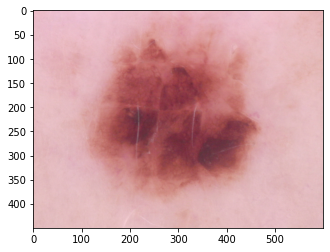

In [8]:
from PIL import Image
img = Image.open('/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030216.jpg')
plt.imshow(img)

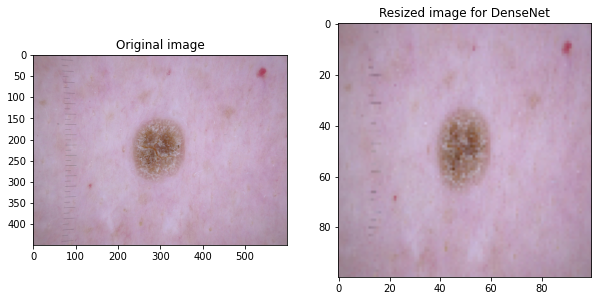

In [9]:
from skimage.io import imread
from cv2 import imread, resize # manipulating the images

# Reading a random image from our data set
fname_images = np.array(df['image_id'])
file_to_read ='../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/'+str(fname_images[13])+'.jpg'

# Resizing the read image to 100x100
img = imread(file_to_read)
img2 = resize(img, (100, 100))

# Show one exampe image before and after
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, ::-1])
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(img2[:, :, ::-1])
plt.title('Resized image for DenseNet')
plt.show()

In [10]:
# Lesion/dis names are given in the description of the data set.
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_ID_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

In [11]:
# Lesion and it's abbriviations
lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']
lesion_names_short = ['nv','mel','bkl','bcc','akiec','vasc','df']

# Maping the lesion type and ID to a dict.
df['lesion_type']=df['dx'].map(lesion_type_dict)
df['lesion_ID'] = df['dx'].map(lesion_ID_dict)

In [12]:
df['lesion_type'].value_counts()

Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: lesion_type, dtype: int64

* The problem is unbalanced, as Melanocytic nevi is more frequent than other labels

In [13]:
fname_images = np.array(df['image_id'])
file_to_read ='../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/'+str(fname_images[13])+'.jpg'

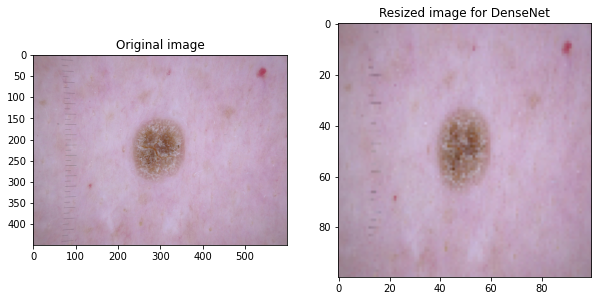

In [14]:
img = cv2.imread(file_to_read)
img2 = cv2.resize(img, (100, 100))

# Show one exampe image before and after
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, ::-1])
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(img2[:, :, ::-1])
plt.title('Resized image for DenseNet')
plt.show()

In [15]:
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.core import Dropout, Activation
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, \
     Dense, Input, Activation, Dropout, GlobalAveragePooling2D, AveragePooling2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from cv2 import imread, resize # manipulating the images
from tensorflow.keras.optimizers import Adam
import os

In [16]:
def produce_new_img(img2: cv2) -> tuple:
    imga = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
    imgb = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE)
    imgc = cv2.rotate(img2, cv2.ROTATE_180)
    imgd = cv2.flip(img2, 0)
    imge = cv2.flip(img2, 1)
    new_imges = imga, imgb, imgc, imgd ,imge
    return new_imges

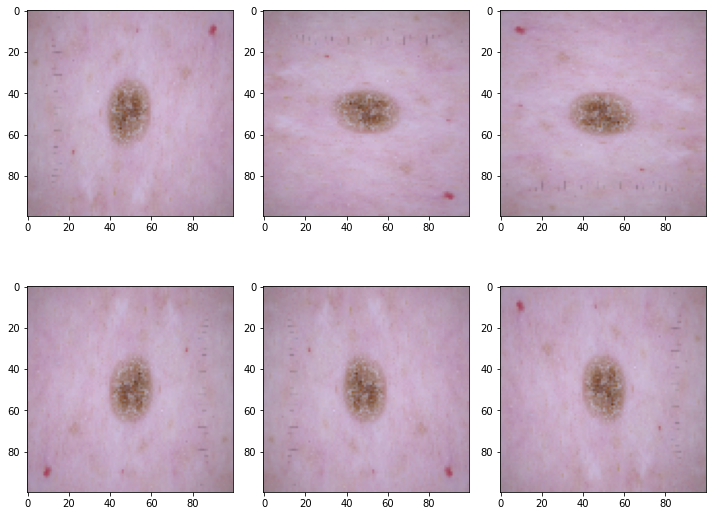

In [17]:
def show_example():
    plt.figure(figsize = (10, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(img2[:, :, ::-1])
    for i in range(5):
        plt.subplot(2, 3, 2+i)
        plt.imshow(new_img[i][:, :, ::-1])
    plt.tight_layout()
    plt.show()
new_img = produce_new_img(img2)

show_example()

In [18]:
x = []
y = []

lista1 = os.listdir('../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/')
lista2 = os.listdir('../input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/')

for i in range(len(lista1)):
    
    fname_image = lista1[i]
    fname_ID = fname_image.replace('.jpg', '')
    file_to_read ='../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/' + str(fname_image) 
    img = imread(file_to_read)                                  
    img2 = resize(img,(100, 100))                               
    x.append(img2)
    output = np.array(df[df['image_id'] == fname_ID].lesion_ID)
    y.append(output[0])
    if output != 0:
        new_img = produce_new_img(img2)
        for i in range(5):
            x.append(new_img[i])
            y.append(output[0])
    if i % 100 == 0:
        print(i, 'images loaded')
for i in range(len(lista2)):

    fname_image = lista2[i]
    fname_ID = fname_image.replace('.jpg', '')
    file_to_read ='../input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/' + str(fname_image)


    img = imread(file_to_read)
    img2 = resize(img, (100, 100))
    x.append(img2)
   
    output = np.array(df[df['image_id'] == fname_ID].lesion_ID)
    y.append(output[0])
   
    if output != 0:
        new_img = produce_new_img(img2)
        for i in range(5):
            x.append(new_img[i])
            y.append(output[0])
    
    if i % 100 == 0:
        print(len(lista1) + i,'images loaded')

0 images loaded
100 images loaded
200 images loaded
300 images loaded
400 images loaded
500 images loaded
600 images loaded
700 images loaded
800 images loaded
1100 images loaded
1200 images loaded
1500 images loaded
1600 images loaded
1800 images loaded
2100 images loaded
2300 images loaded
2400 images loaded
2600 images loaded
2700 images loaded
2800 images loaded
2900 images loaded
3000 images loaded
3100 images loaded
3200 images loaded
3500 images loaded
3600 images loaded
3700 images loaded
3900 images loaded
4100 images loaded
4500 images loaded
4600 images loaded
4700 images loaded
4800 images loaded
4900 images loaded
5000 images loaded
5100 images loaded
5300 images loaded
5400 images loaded
5700 images loaded
5900 images loaded
6000 images loaded
6100 images loaded
6200 images loaded
6400 images loaded
6600 images loaded
6700 images loaded
6800 images loaded
6900 images loaded
7000 images loaded
7100 images loaded
7200 images loaded
7300 images loaded
7400 images loaded
7500

In [19]:
x = np.array(x)
y = np.array(y)

y_train = to_categorical(y, num_classes = 7)

X_train, X_test, y_train, y_test = train_test_split(x,                  
                                                    y_train,            
                                                    test_size = 0.20,   
                                                    random_state = 50,  
                                                    stratify = y)       

print('Train dataset shape', X_train.shape)
print('Test dataset shape', X_test.shape)

Train dataset shape (21252, 100, 100, 3)
Test dataset shape (5313, 100, 100, 3)


In [20]:
def est_class_weights(dis_id: np.array) -> dict:
    
    class_weights = np.around(compute_class_weight(class_weight = 'balanced', classes = np.unique(dis_id), y = y), 2)
    class_weights = dict(zip(np.unique(dis_id), class_weights))

y_id = np.array(df['lesion_ID'])
new_class_weights = est_class_weights(y_id)
print(new_class_weights)

None


In [21]:
model = Sequential()
        

model.add(Conv2D(filters = 96,
                kernel_size = (11, 11),
                strides = (4, 4),
                activation = 'relu',
                input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))


model.add(Conv2D(filters = 256,
                kernel_size=(5, 5),
                strides=(1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))


model.add(Conv2D(filters = 384,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 padding="valid"))
model.add(BatchNormalization())


model.add(Conv2D(filters = 384,
                kernel_size = (1, 1), 
                strides = (1, 1), 
                activation = 'relu', 
                padding = "same"))
model.add(BatchNormalization())


model.add(Conv2D(filters = 256, 
                kernel_size = (1, 1),
                strides = (1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))
              
model.add(Flatten()) 

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.4))
              

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.4))
              
model.add(Dense(7, activation = 'softmax'))

2023-01-26 16:57:24.621355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 16:57:24.803011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 16:57:24.803849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 16:57:24.805274: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [22]:
def mod_checkpoint_callback() -> None:
    
    trained_model = ModelCheckpoint(filepath = 'model.h5',  
                             save_weights_only = False,     
                             monitor = 'val_accuracy',      
                             mode = 'auto',                 
                             save_best_only = True,     
                             verbose = 1)
    return trained_model

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
early_stopping_monitor = EarlyStopping(patience = 35, monitor = 'val_accuracy')

model_checkpoint_callback = mod_checkpoint_callback()


optimizer = Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-3)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

datagen = ImageDataGenerator(zoom_range = 0.3, horizontal_flip = True, shear_range = 0.3)
datagen.fit(X_train)

batch_size = 32
epochs = 35


history = model.fit(datagen.flow(X_train,y_train),
                    epochs = epochs,
                    batch_size = batch_size,
                    shuffle = True,
                    callbacks = [early_stopping_monitor, model_checkpoint_callback],
                    validation_data = (X_test, y_test),
                    class_weight = new_class_weights
                )

2023-01-26 16:57:30.830549: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/35


2023-01-26 16:57:32.578586: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


665/665 [==============================] - 58s 76ms/step - loss: 1.2625 - accuracy: 0.5173 - val_loss: 2.2122 - val_accuracy: 0.2507

Epoch 00001: val_accuracy improved from -inf to 0.25071, saving model to model.h5
Epoch 2/35
665/665 [==============================] - 50s 75ms/step - loss: 1.0622 - accuracy: 0.5856 - val_loss: 1.3494 - val_accuracy: 0.4903

Epoch 00002: val_accuracy improved from 0.25071 to 0.49031, saving model to model.h5
Epoch 3/35
665/665 [==============================] - 51s 76ms/step - loss: 0.9916 - accuracy: 0.6153 - val_loss: 1.2352 - val_accuracy: 0.5057

Epoch 00003: val_accuracy improved from 0.49031 to 0.50574, saving model to model.h5
Epoch 4/35
665/665 [==============================] - 52s 78ms/step - loss: 0.9431 - accuracy: 0.6308 - val_loss: 1.4475 - val_accuracy: 0.3887

Epoch 00004: val_accuracy did not improve from 0.50574
Epoch 5/35
665/665 [==============================] - 50s 75ms/step - loss: 0.9160 - accuracy: 0.6388 - val_loss: 0.9634 - v

In [25]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Accuracy: %.2f%%" % (scores[1] * 100))

167/167 [==============================] - 1s 5ms/step - loss: 1.0332 - accuracy: 0.6921
Accuracy: 69.21%


In [26]:
import matplotlib.pyplot as plt

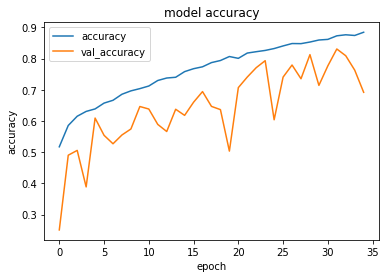

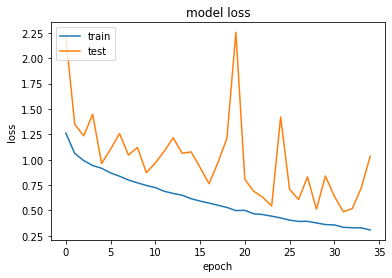

In [27]:
def display_accuracy() -> None:
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()
    
    
def display_loss() -> None:
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

display_accuracy()
display_loss()

In [28]:
y_pred = model.predict(X_test)

def test_model() -> tuple:
    """ Tunning the accurate results and inaccurate results

    Returns:
        (total, accurate) [tuple]: tuple of total tested test-cases, accurate
    """
    total = 0
    accurate = 0
    accurateindex = []
    wrongindex = []
    for i in range(len(y_pred)):
        if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
            accurate += 1
            accurateindex.append(i)
        else:
            wrongindex.append(i)
        total += 1
    return (total, accurate)

total, accurate = test_model()
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate / total * 100, 3), '%')

Total-test-data; 5313 	accurately-predicted-data: 3677 	 wrongly-predicted-data:  1636
Accuracy: 69.208 %


In [29]:
best_model = load_model('./model.h5')

# Compute predictions
y_pred_prob = np.around(best_model.predict(X_test),3)
y_pred = np.argmax(y_pred_prob, axis = 1)
y_test2 = np.argmax(y_test, axis = 1)

In [30]:
# [+] inform the user with model Accuracy %
scores = best_model.evaluate(X_test, y_test, verbose = 1)
print("Accuracy: %.2f%%" % (scores[1] * 100))

167/167 [==============================] - 1s 4ms/step - loss: 0.4875 - accuracy: 0.8310
Accuracy: 83.10%


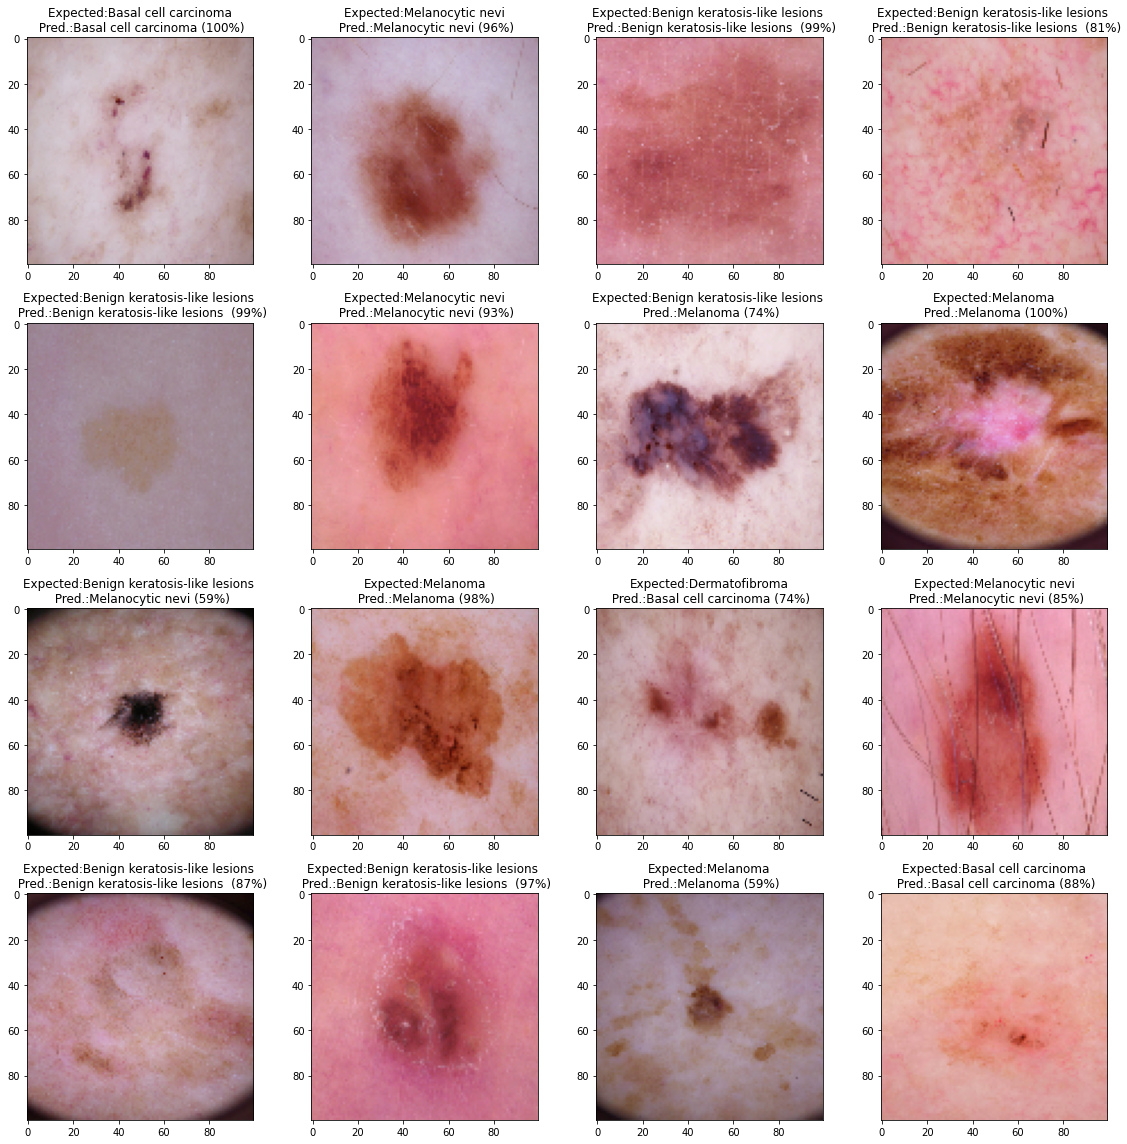

In [31]:
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(X_test[index,:,:,::-1])
    label_exp = lesion_names[y_test2[index]]  #expected label
    label_pred = lesion_names[y_pred[index]]  #predicted label
    label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred)+' ('+str(label_pred_prob)+'%)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('final_figure.png',dpi=300)
plt.show()

In [32]:
#Accuracy for each type
acc_tot= []

for i in range(7):
    acc_parz = round(np.mean(y_test2[y_test2 == i] == y_pred[y_test2 == i]),2)
    lab_parz = lesion_names[i]
    print('accuracy for',lab_parz,'=',acc_parz)
    acc_tot.append(acc_parz)

accuracy for Melanocytic nevi = 0.84
accuracy for Melanoma = 0.72
accuracy for Benign keratosis-like lesions  = 0.84
accuracy for Basal cell carcinoma = 0.94
accuracy for Actinic keratoses = 0.9
accuracy for Vascular lesions = 0.98
accuracy for Dermatofibroma = 0.86


In [33]:
acc_tot = np.array(acc_tot)
freq = np.unique(y_test2,return_counts=True)[1]

np.sum(acc_tot*freq)/np.sum(freq)

0.8308639186900059

* References:

https://www.kaggle.com/code/avanishsingh007/skin-cancer-type-detection-using-cnn-assignment

https://www.kaggle.com/code/hozifanasef/ham10000-cnn-skin-cancer-type-detection